In [44]:
import scipy as sp
import random
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import os.path
import sys
import numpy as np
from scipy.optimize import fsolve

In [45]:
def defaultGenerate():
    """
    Функция создания данных
    """
    return [1, 2, 3, 4, 5], [3.9, 4.9, 3.4, 1.4, 1.2]


In [46]:
def rand(start, finish, num):
    """
    Функция генерации/создания массива случайных данных
    """
    
    result = []
    
    random.seed(time.time())
    for i in range(num):
        result.append(random.uniform(start, finish))
        
    return result

In [47]:
def randomGenerate(start, finish, num):
    """
    Функция генерации/создания случайных данных по двум координатам
    """
    
    return rand(start, finish, num), rand(start, finish, num) 

In [48]:
def readDataFile(pathFile):
    """
    Function of read data
    Функция чтения данных из файла
    Формат данный в файле: x_компонента y_компонента
    Если по указанному пути не существует файла, то возврат ошибки -1, иначе возврат 0
    """
    
    x = []
    y = []

    if os.path.isfile(pathFile) == True:
        file = open(pathFile, "r")

        for line in file.readlines():
            listOfNumbers = [float(i) for i in line.split()]
            
            if len(listOfNumbers) > 0:
                x.append(float(listOfNumbers[0]))
                y.append(float(listOfNumbers[1]))

        file.close()
        id_error = 0
    else:
        id_error = -1

    return id_error, x, y


In [49]:
def countError(y1, y2):
    """
    Функция вычисления ошибки
    """
    
    error_value = 0.0
    error_id = 0
    
    if len(y1) != len(y2):
        return -1, error_value
    
    for i in range(len(y1)):
        error_value += math.fabs(y1[i] - y2[i])**2
        
    return error_id, error_value


In [50]:
def mnk(x, y, degree):
    """
    Функция выполнения метода наименьших квадратов для линейной функции
    """
    mnk_y = []
    
    # получаем параметры модели для полинома степени 1/линейная функция
    fp, residuals, rank, sv, rcond = np.polyfit(x, y, degree, full=True)
    # функция-полином, если её напечатать, то увидите математическое выражение
    f = np.poly1d(fp)
    # напечатать функцию, которая получилась
    print(f)
    
    for i in range(len(x)):
        mnk_y.append(f(x[i]))
        
    return mnk_y


In [51]:
def drawResult(x, y, new_y):
    plt.title('Title')
    plt.scatter(x,y)
    plt.plot(x,new_y)
    plt.show()
    
def drawPoints(x, y):
    plt.scatter(x, y)


#### Задание:
1. сравнить ошибки решения задачи регрессии для данных, заданных по дефолту, а именно линейной и квадратичной регрессии. Изобразить решения на одном графике
2. сравнить ошибки решения задачи регрессии для данных, заданных случайно, а именно линейной и квадратичной регрессии. Изобразить решения на одном графике для каждой вариации отдельно.

Рассмотреть следующие наборы данных:

1. 10 точек от 0 до 10
2. 10 точек от -10 до 10
3. 10 точек от 0 до 100
4. 10 точек от -100 до 100
5. 100 точек от 0 до 100
6. 100 точек от -100 до 100
7. 100 точек от 0 до 1000
9. 100 точек от -1000 до 1000
10. 1000 точек от 0 до 1000 
11. 1000 точек от -1000 до 1000 
12. 10000 точек от 0 до 1000 
13. 10000 точек от -1000 до 1000
 
 
3. (*) Написать метод наименьших квадратов с использованием любой другой функции - логарифмической, экспоненциальной, гиперболической 
4. (*) Написать метод наименьших квадратов функции через матрицы для линейной регрессии

 
-0.89 x + 5.63
         2
-0.2071 x + 0.3529 x + 4.18
        3         2
0.3583 x - 3.432 x + 8.81 x - 1.84
        4          3         2
0.0125 x + 0.2083 x - 2.812 x + 7.792 x - 1.3
           5           4           3         2
-0.003199 x + 0.06049 x - 0.06359 x - 2.093 x + 6.915 x - 0.9161
          6          5           4          3         2
-0.00101 x + 0.0081 x + 0.03237 x - 0.1634 x - 1.504 x + 5.982 x - 0.4544
            7            6           5          4          3         2
-0.0002169 x + 0.000844 x + 0.00737 x + 0.0115 x - 0.1873 x - 1.122 x + 5.25 x - 0.06019
            8             7            6            5             4
-4.183e-05 x + 6.185e-05 x + 0.001132 x + 0.005349 x - 0.0004532 x
           3          2
 - 0.1864 x - 0.8759 x + 4.705 x + 0.2514
           9            8             7            6            5
-7.74e-06 x - 9.26e-07 x + 0.0001452 x + 0.001056 x + 0.003665 x
            4          3          2
 - 0.00718 x - 0.1785 x - 0.7126 x + 4.3 x

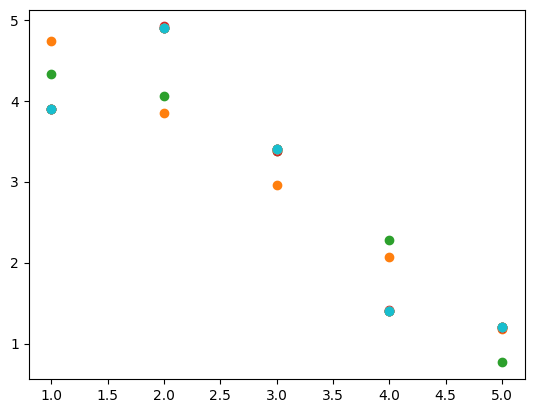

In [52]:
error = []
num = []

# генерация исходных данных
# data_x, data_y = randomGenerate(10, 100, 5)
data_x, data_y = defaultGenerate()
drawPoints(data_x, data_y)
  
for i in range(1,10,1):
    # вычисление зависимости между исходными данными (y*)
    new_y = mnk(data_x, data_y, i)
    # вычисление ошибки
    error.append(countError(data_y, new_y)[1])
    num.append(i)
    # изображение результатов
    drawPoints(data_x, new_y)
    
#drawPoints(num, error)
plt.show()
